In [39]:
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp

In [3]:
import os
# propriatary mnist management
DATASETSLIB_HOME = './datasetslib'
import sys
if not DATASETSLIB_HOME in sys.path:
    sys.path.append(DATASETSLIB_HOME)
%reload_ext autoreload
%autoreload 2
import datasetslib

from datasetslib import util as dsu
datasetslib.datasets_root = os.path.join(os.path.expanduser('~'),'datasets')

In [10]:
import pandas as pd
import numpy as np
filename = os.path.join(datasetslib.datasets_root,'international-airline-passengers.csv')
dataframe = pd.read_csv(filename,usecols=[1],header=0)
dataset = dataframe.values
dataset = dataset.astype(np.float32)

In [15]:
scaler = pp.MinMaxScaler(feature_range=(0,1))
normalized_dataset = scaler.fit_transform(dataset)

In [19]:
train,test=dsu.train_test_split(normalized_dataset,train_size=0.67)

In [20]:
n_x=2
n_y=1
X_train, Y_train, X_test, Y_test = dsu.mvts_to_xy(train,test,n_x=n_x,n_y=n_y)

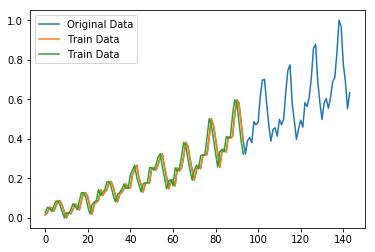

In [40]:
plt.plot(normalized_dataset,label='Original Data')
plt.plot(X_train,label='Train Data')
plt.legend()
plt.show()

In [65]:
state_size = 4
n_epochs = 100
n_timesteps = n_x
learning_rate = 0.1
n_x_vars = 1
n_y_vars = 1

In [45]:
train,test=dsu.train_test_split(normalized_dataset,train_size=0.67)

In [46]:
X_train, Y_train, X_test, Y_test = dsu.mvts_to_xy(train,
test,n_x=n_x,n_y=n_y)

In [47]:
import tensorflow as tf

In [52]:
X_p = tf.placeholder(tf.float32,[None,n_timesteps,n_x_var],name='X_p')
Y_p = tf.placeholder(tf.float32,[None,n_timesteps,n_y_var],name='Y_p')

In [53]:
rnn_inputs = tf.unstack(X_p,axis=1)

In [54]:
cell = tf.nn.rnn_cell.BasicRNNCell(state_size)

In [56]:
rnn_outputs, final_state = tf.nn.static_rnn(cell,rnn_inputs,dtype=tf.float32)

In [57]:
W = tf.get_variable('W',[state_size,n_y_var])
b = tf.get_variable('b',[n_y_var])
predictions = [tf.matmul(rnn_output, W) + b for rnn_output in rnn_outputs]

In [58]:
y_as_list = tf.unstack(Y_p,num=n_timesteps,axis=1)

In [59]:
mse = tf.losses.mean_squared_error
losses = [mse(labels=label, predictions=prediction) for prediction, label in zip(predictions, y_as_list)]

In [60]:
total_loss = tf.reduce_mean(losses)

In [67]:
optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(total_loss)

In [68]:
with tf.Session() as tfs:
    tfs.run(tf.global_variables_initializer())
    epoch_loss = 0.0
    for epoch in range(n_epochs):
        feed_dict={X_p: X_train.reshape(-1, n_timesteps, 
                                        n_x_vars), 
                   Y_p: Y_train.reshape(-1, n_timesteps, 
                                        n_x_vars)
                  }
        epoch_loss,y_train_pred,_=tfs.run([total_loss,predictions,optimizer], 
                                            feed_dict=feed_dict
                                           )
    print("train mse = {}".format(epoch_loss))
    feed_dict={X_p: X_test.reshape(-1, n_timesteps, 
                                    n_x_vars), 
               Y_p: Y_test.reshape(-1, n_timesteps, 
                                    n_y_vars)
              }
    test_loss, y_test_pred = tfs.run([total_loss,predictions], 
                                     feed_dict=feed_dict
                                    )
    print('test mse = {}'.format(test_loss))
    print('test rmse = {}'.format(math.sqrt(test_loss)))

InvalidArgumentError: Incompatible shapes: [94,1] vs. [47,1]
	 [[Node: gradients_2/mean_squared_error/SquaredDifference_grad/BroadcastGradientArgs = BroadcastGradientArgs[T=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](gradients_2/mean_squared_error/SquaredDifference_grad/Shape, gradients_2/mean_squared_error/SquaredDifference_grad/Shape_1)]]

Caused by op 'gradients_2/mean_squared_error/SquaredDifference_grad/BroadcastGradientArgs', defined at:
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-67-93349d709959>", line 1, in <module>
    optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(total_loss)
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/tensorflow/python/training/optimizer.py", line 355, in minimize
    grad_loss=grad_loss)
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/tensorflow/python/training/optimizer.py", line 456, in compute_gradients
    colocate_gradients_with_ops=colocate_gradients_with_ops)
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 609, in gradients
    grad_scope, op, func_call, lambda: grad_fn(op, *out_grads))
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 375, in _MaybeCompile
    return grad_fn()  # Exit early
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 609, in <lambda>
    grad_scope, op, func_call, lambda: grad_fn(op, *out_grads))
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py", line 921, in _SquaredDifferenceGrad
    rx, ry = gen_array_ops._broadcast_gradient_args(sx, sy)
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 528, in _broadcast_gradient_args
    "BroadcastGradientArgs", s0=s0, s1=s1, name=name)
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3160, in create_op
    op_def=op_def)
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

...which was originally created as op 'mean_squared_error/SquaredDifference', defined at:
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
[elided 18 identical lines from previous traceback]
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-59-3567beadb133>", line 2, in <module>
    losses = [mse(labels=label, predictions=prediction) for prediction, label in zip(predictions, y_as_list)]
  File "<ipython-input-59-3567beadb133>", line 2, in <listcomp>
    losses = [mse(labels=label, predictions=prediction) for prediction, label in zip(predictions, y_as_list)]
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/tensorflow/python/ops/losses/losses_impl.py", line 575, in mean_squared_error
    losses = math_ops.squared_difference(predictions, labels)
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 4822, in squared_difference
    "SquaredDifference", x=x, y=y, name=name)
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3160, in create_op
    op_def=op_def)
  File "/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Incompatible shapes: [94,1] vs. [47,1]
	 [[Node: gradients_2/mean_squared_error/SquaredDifference_grad/BroadcastGradientArgs = BroadcastGradientArgs[T=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](gradients_2/mean_squared_error/SquaredDifference_grad/Shape, gradients_2/mean_squared_error/SquaredDifference_grad/Shape_1)]]


In [74]:
import sys
import time

In [81]:
original = '.............................'

In [82]:
len(original)

29

In [84]:
sys.stdout.write(original)
updating = '>'
for i in range(len(original)):
    updating = '=' + updating         
    sys.stdout.write("\r{}".format(updating))
    time.sleep(1)

=============================>

In [85]:
x=3

In [86]:
!ls


Basics.ipynb			     Regression.ipynb
Classification.ipynb		     RNN introduction.ipynb
datasetslib			     slim_logs
Intro to Keras.ipynb		     Tour of some TF Libraries.ipynb
Intro to MultiLayerPerceptron.ipynb  Untitled.ipynb
mnist
